In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    cohen_kappa_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

CSV_PATH = "student_data.csv" 
TARGET_COL = "Output"

df = pd.read_csv(CSV_PATH, sep=";")  
print("Shape:", df.shape)
df.head()


Shape: (4424, 35)


,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [84]:
df.info()

df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   evening attendance                              4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital status,4424.0,NaN,NaN,NaN,1.178571,0.605747,1.0,1.0,1.0,1.0,6.0
Application mode,4424.0,NaN,NaN,NaN,6.88698,5.298964,1.0,1.0,8.0,12.0,18.0
Application order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,NaN,NaN,NaN,9.899186,4.331792,1.0,6.0,10.0,13.0,17.0
evening attendance,4424.0,NaN,NaN,NaN,0.890823,0.311897,0.0,1.0,1.0,1.0,1.0
Previous qualification,4424.0,NaN,NaN,NaN,2.53142,3.963707,1.0,1.0,1.0,1.0,17.0
Nacionality,4424.0,NaN,NaN,NaN,1.254521,1.748447,1.0,1.0,1.0,1.0,21.0
Mother's qualification,4424.0,NaN,NaN,NaN,12.322107,9.026251,1.0,2.0,13.0,22.0,29.0
Father's qualification,4424.0,NaN,NaN,NaN,16.455244,11.0448,1.0,3.0,14.0,27.0,34.0
Mother's occupation,4424.0,NaN,NaN,NaN,7.317812,3.997828,1.0,5.0,6.0,10.0,32.0


In [85]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Categorical columns: ['Output']


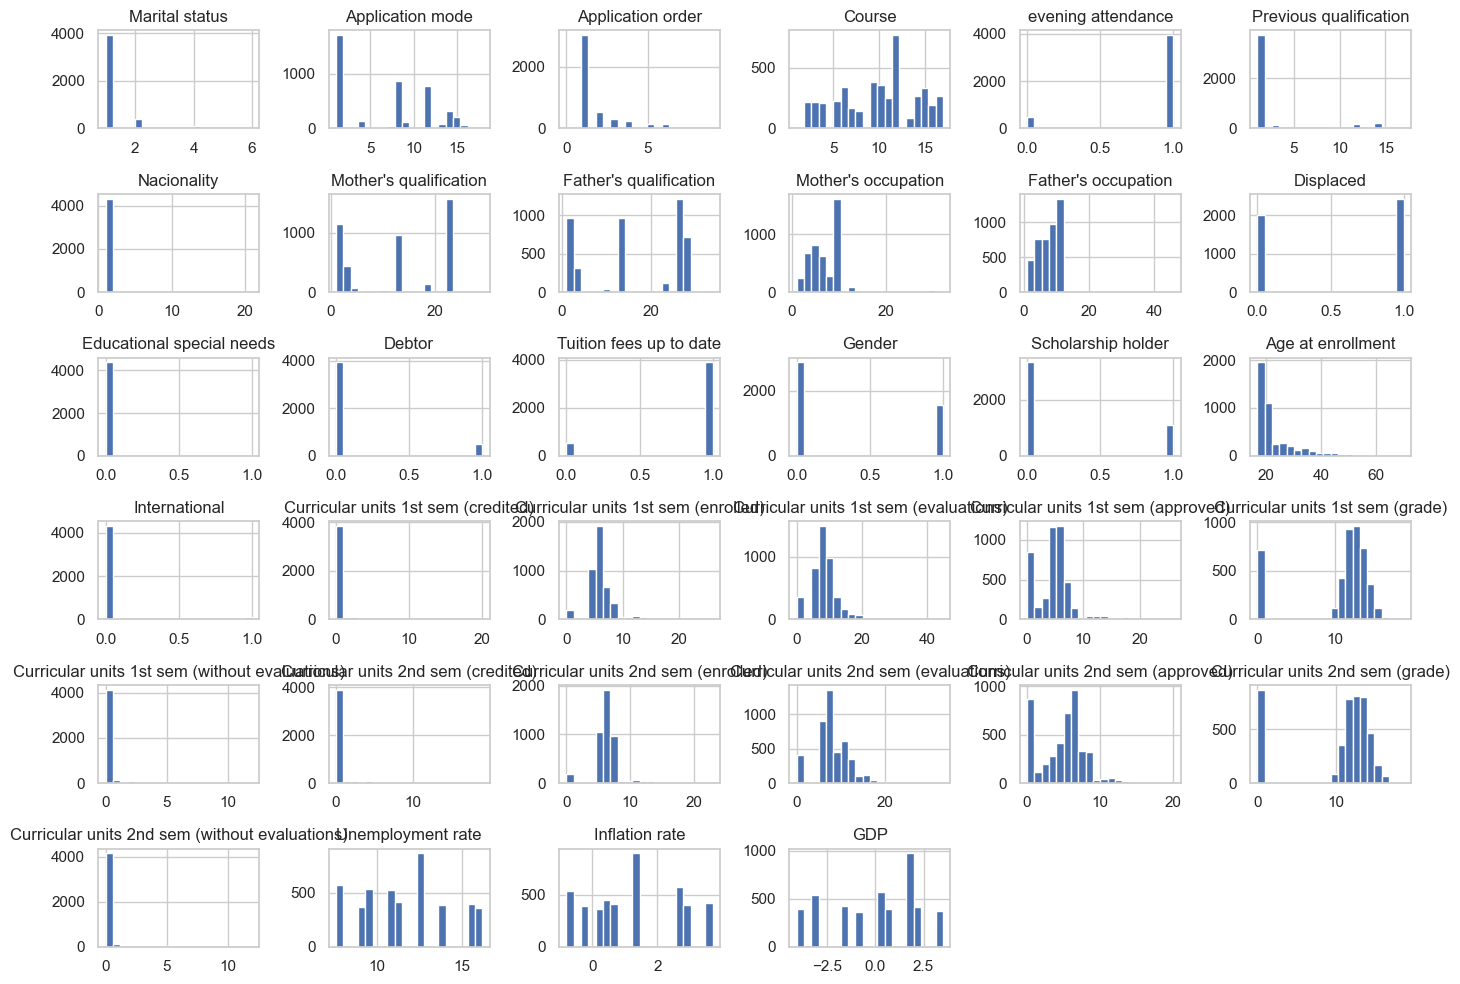

In [86]:
df[numeric_cols].hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

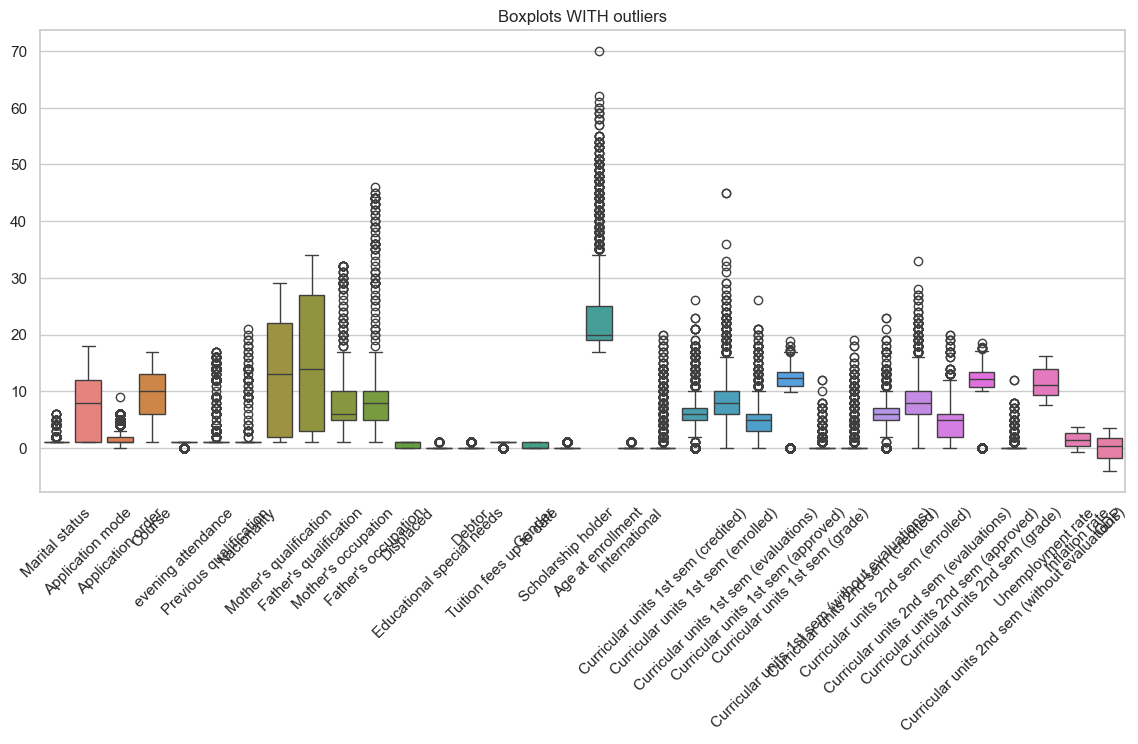

In [87]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots WITH outliers")
plt.xticks(rotation=45)
plt.show()

Shape without outliers: (675, 35)


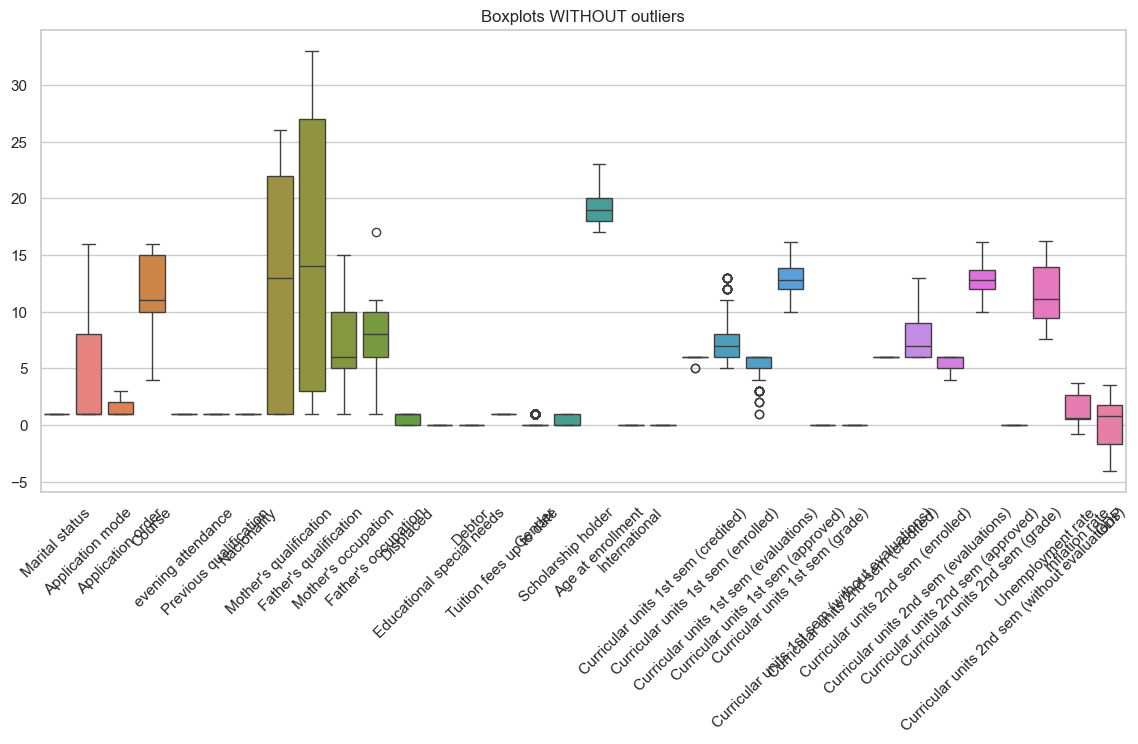

In [88]:
df_no_outliers = df.copy()
for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]

print("Shape without outliers:", df_no_outliers.shape)

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_no_outliers[numeric_cols])
plt.title("Boxplots WITHOUT outliers")
plt.xticks(rotation=45)
plt.show()

Generating boxplots WITHOUT OUTLIERS...


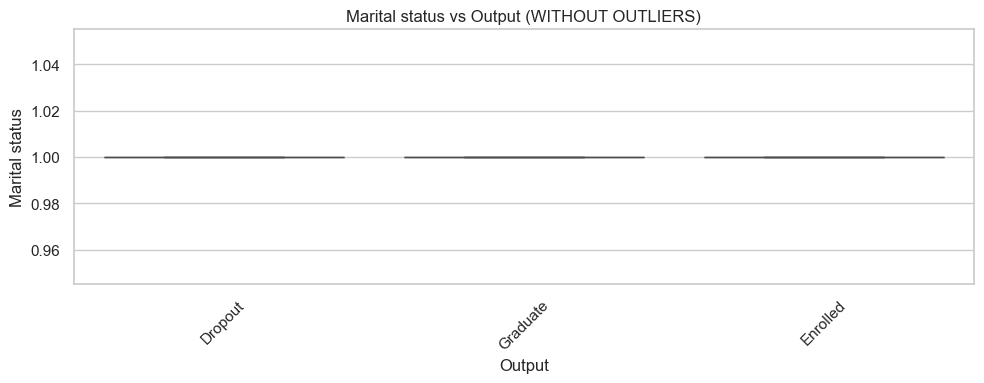

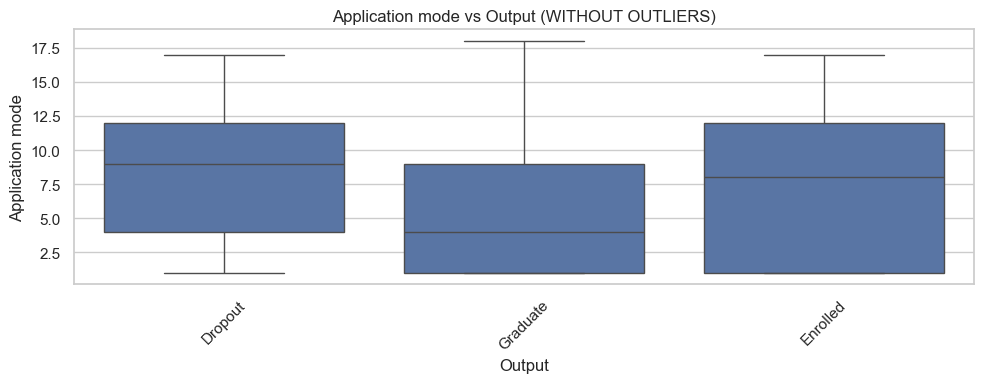

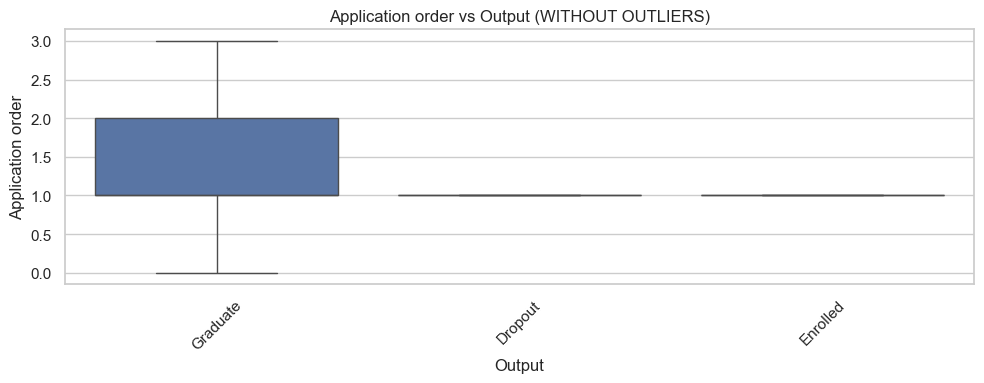

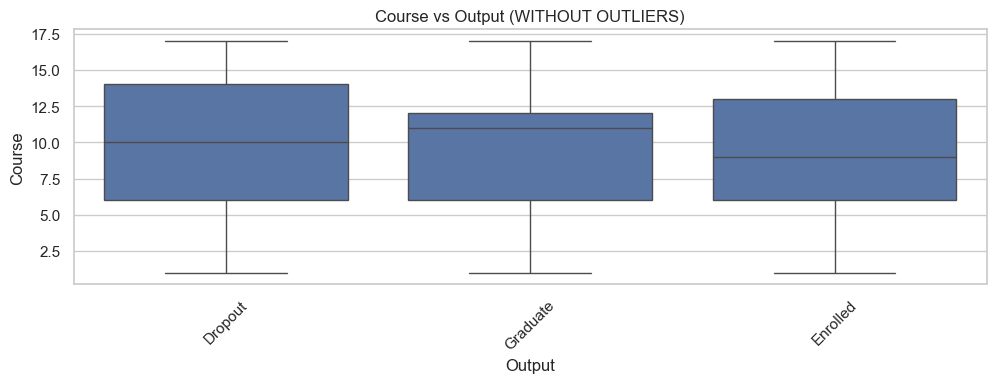

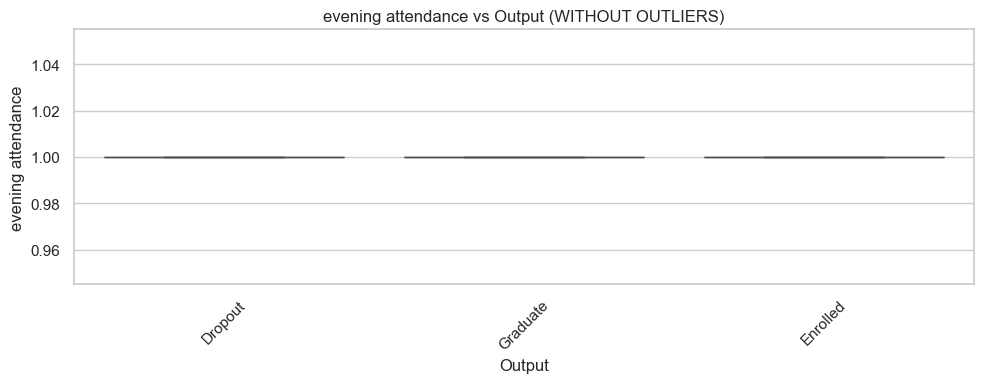

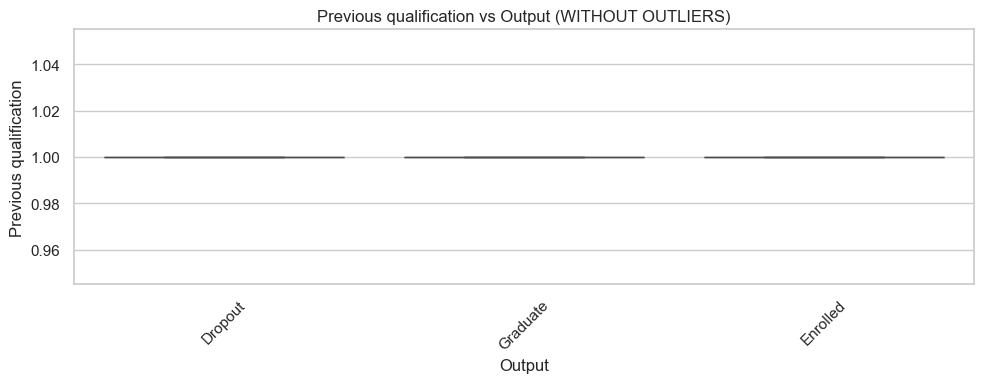

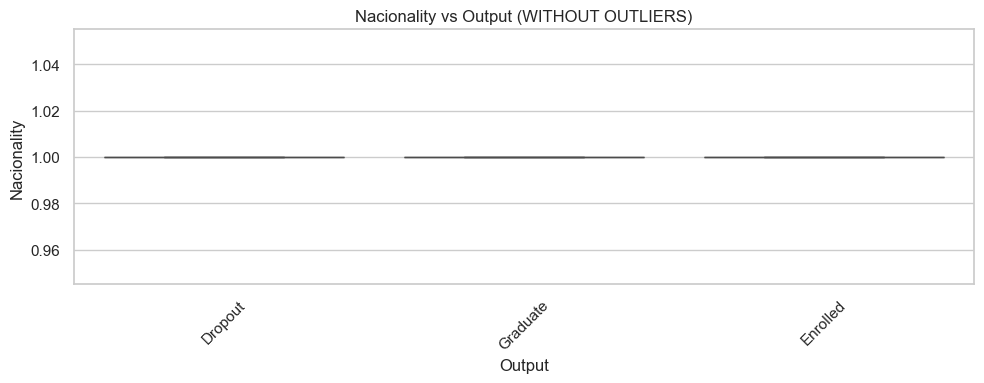

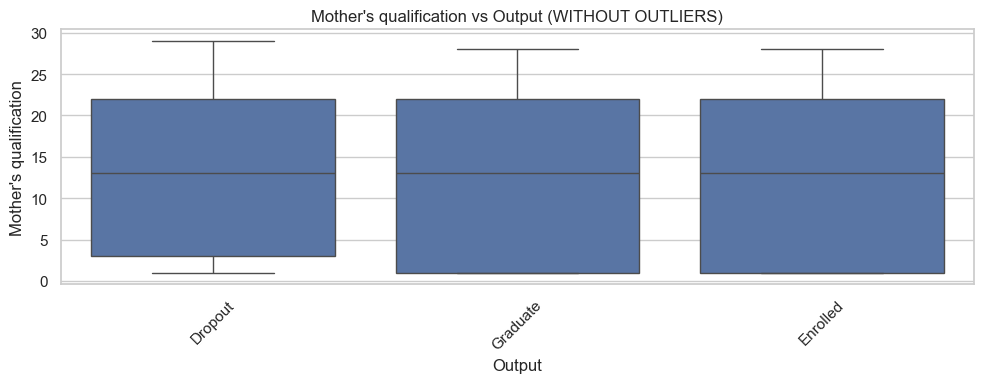

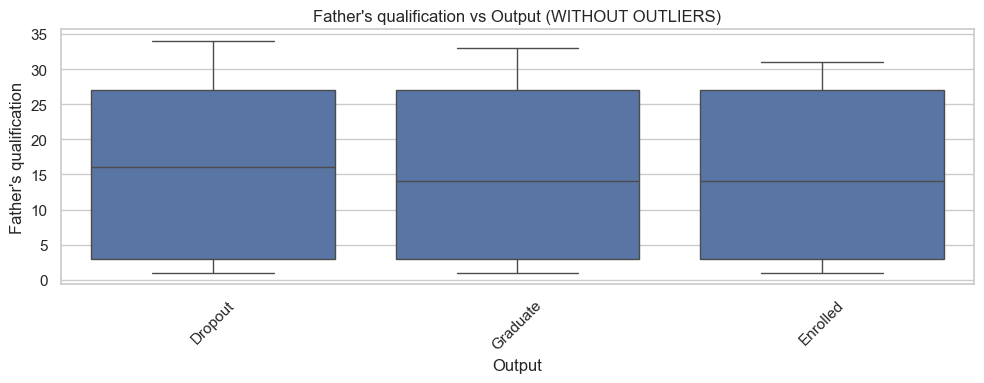

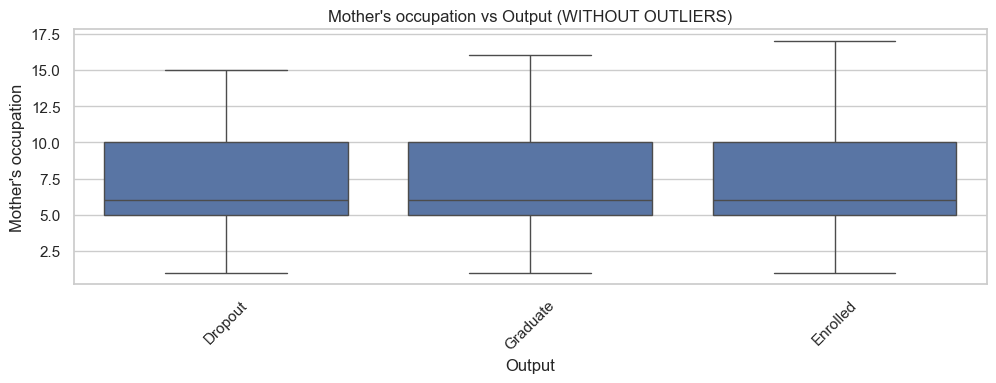

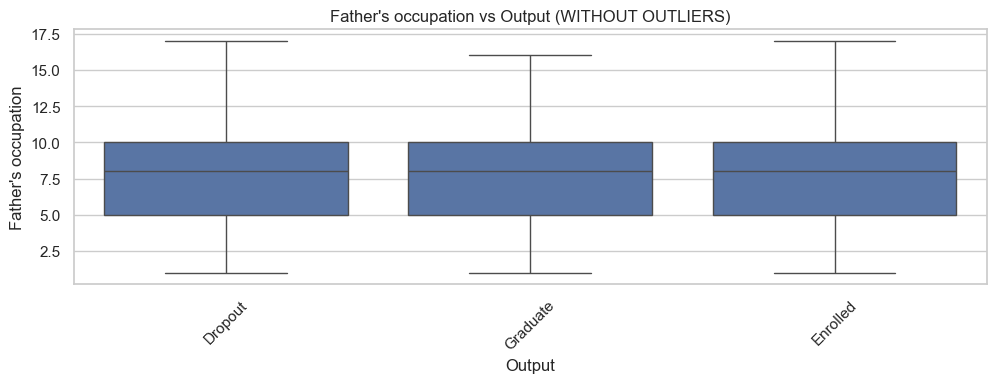

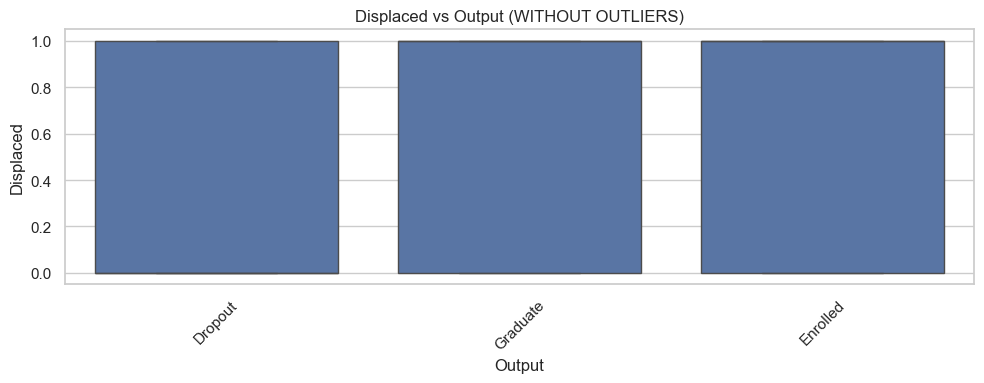

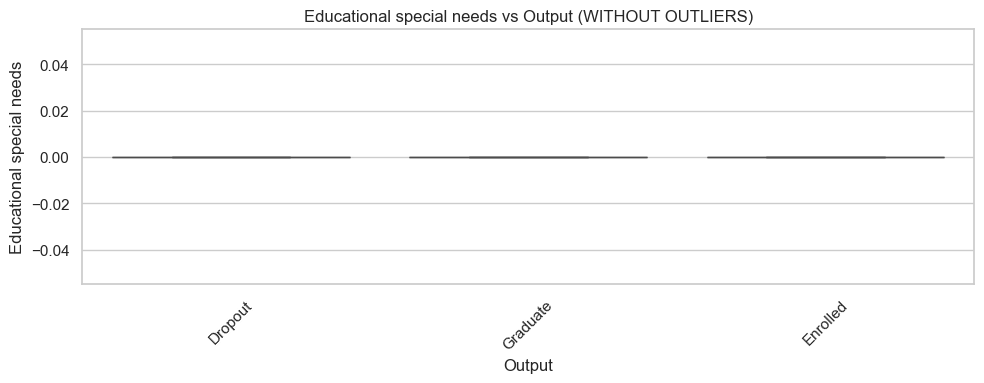

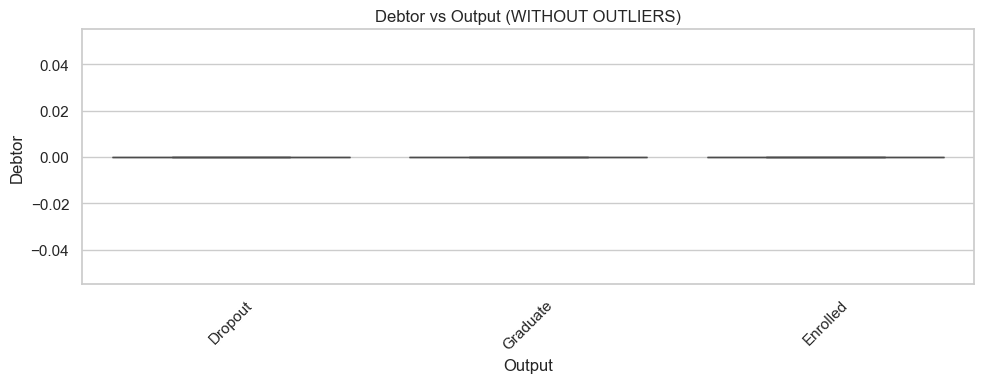

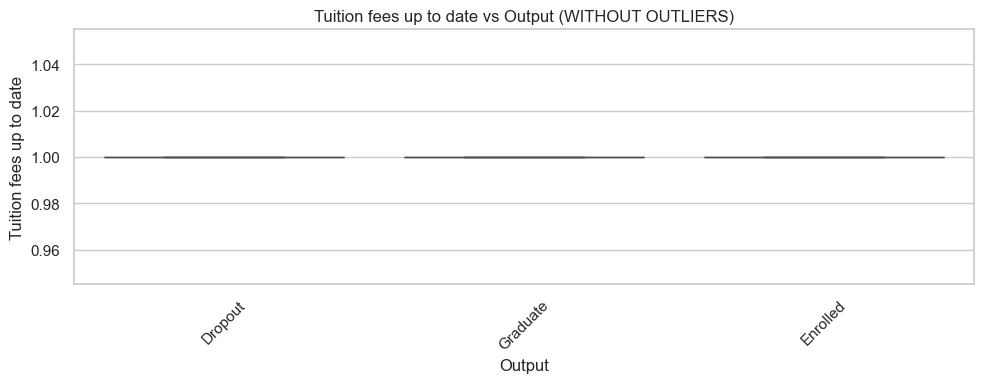

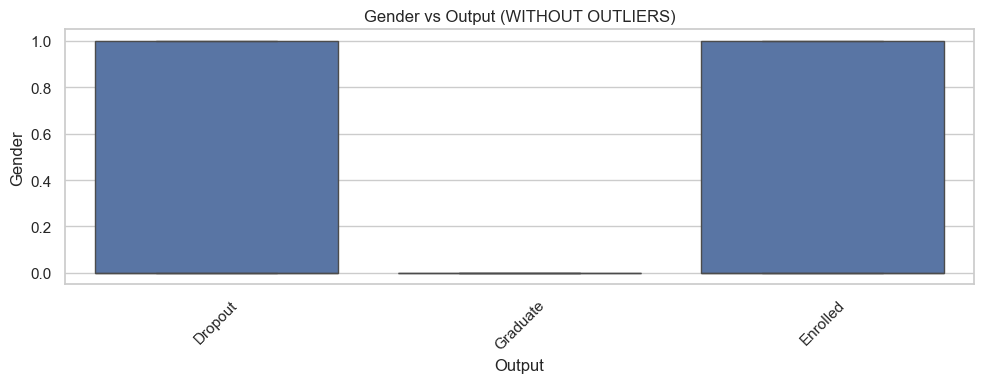

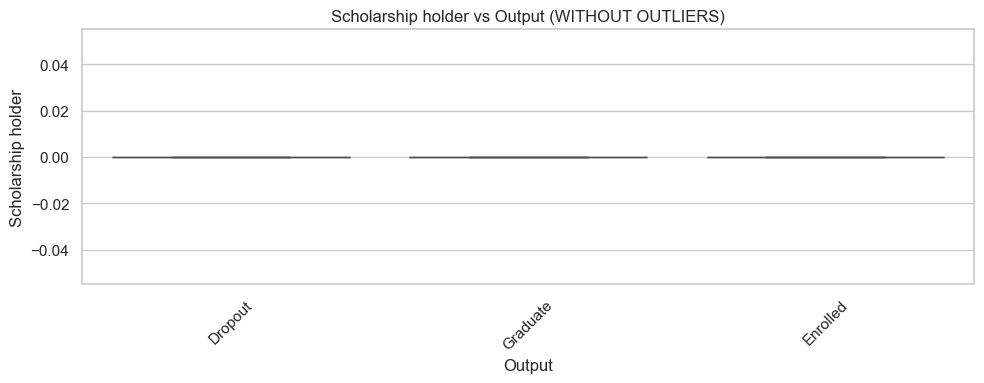

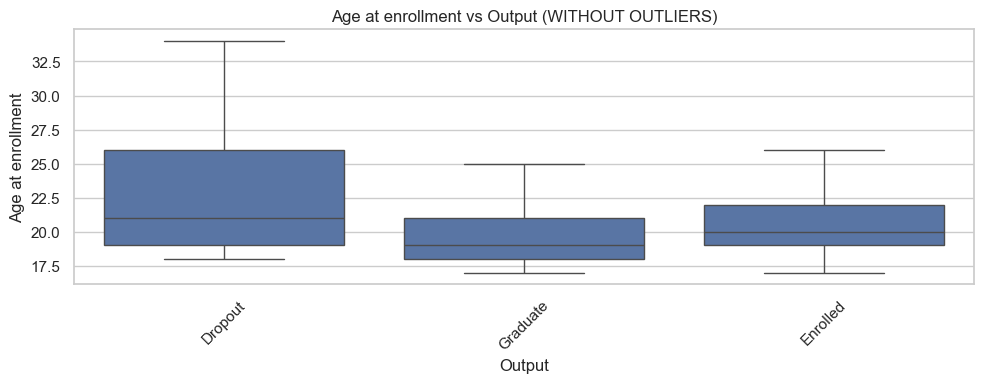

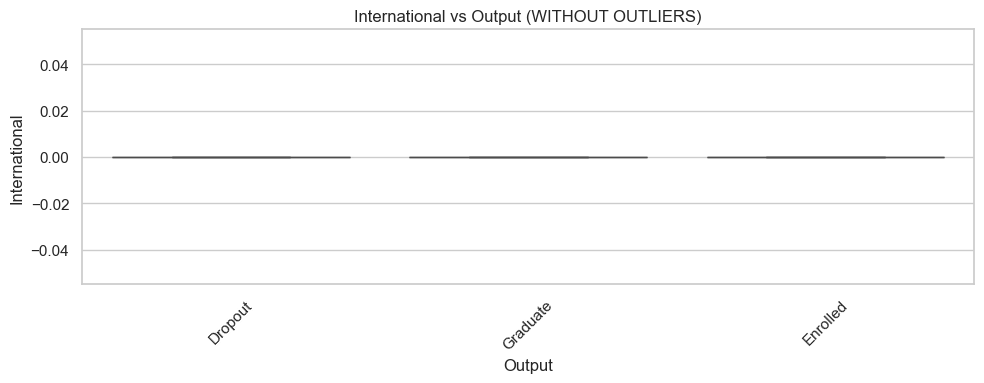

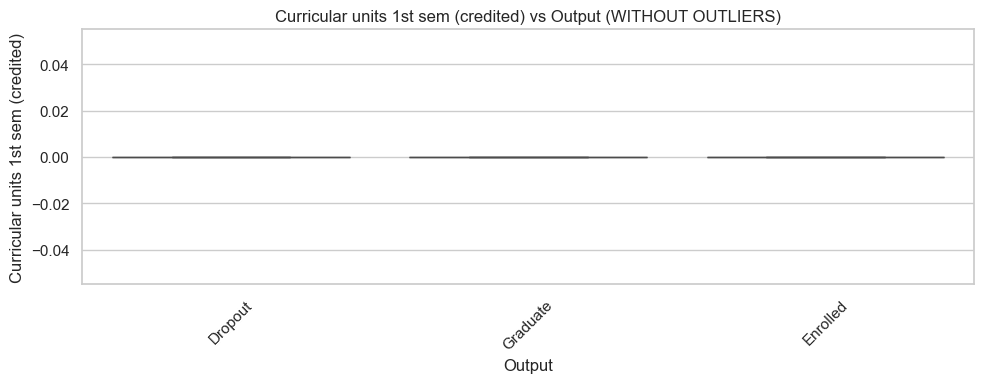

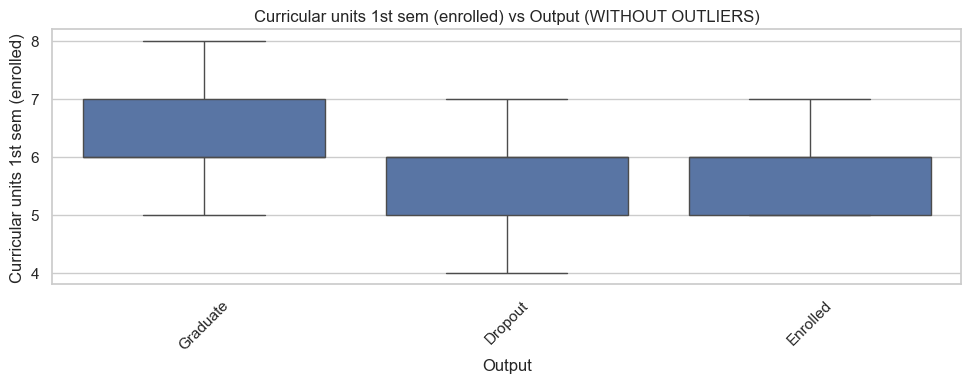

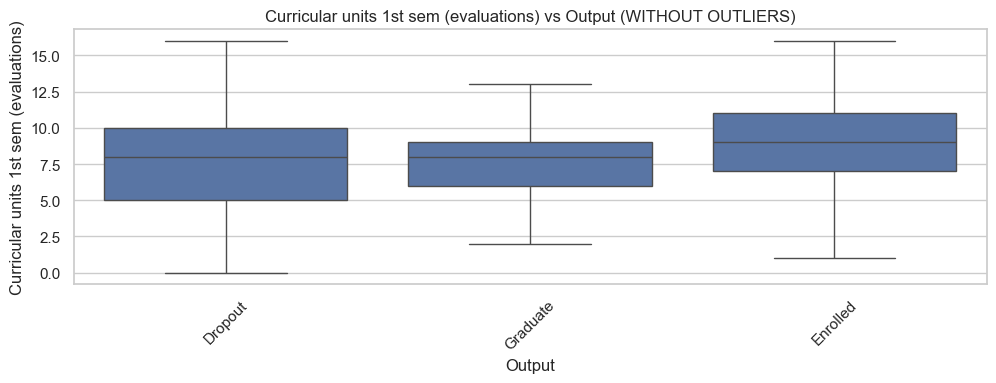

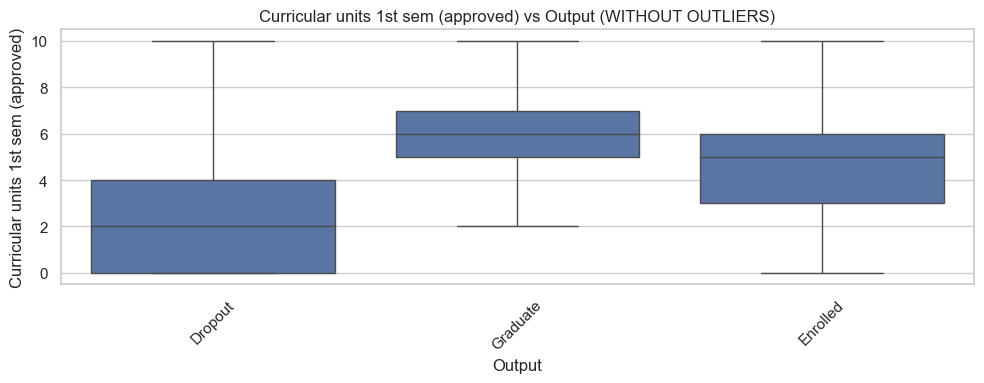

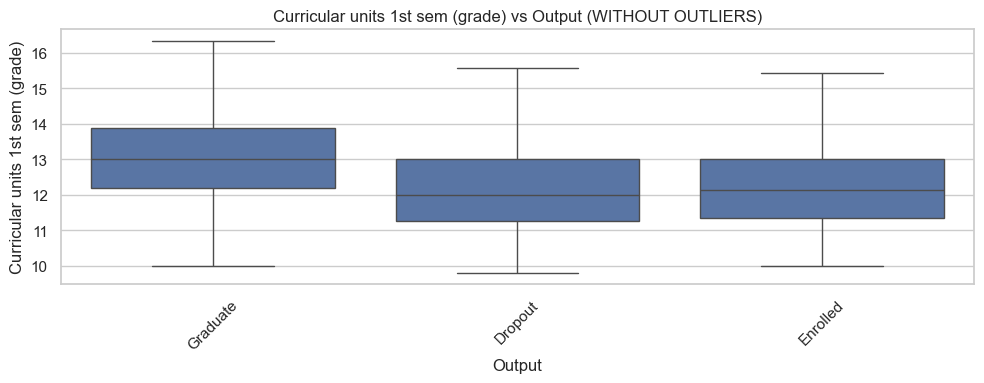

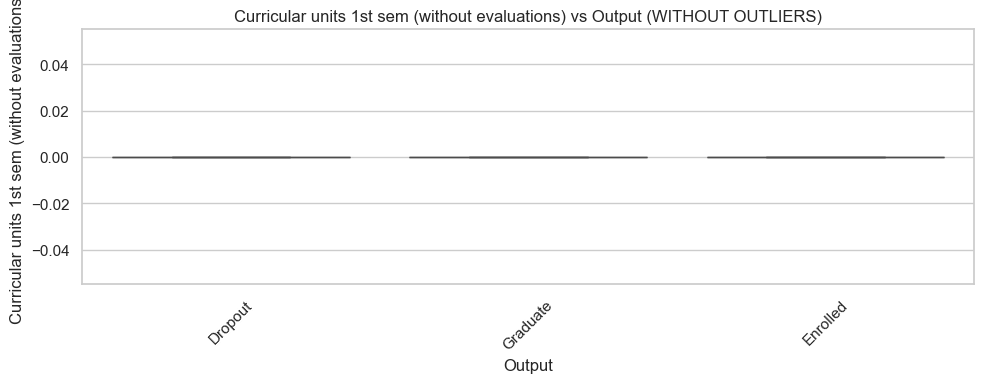

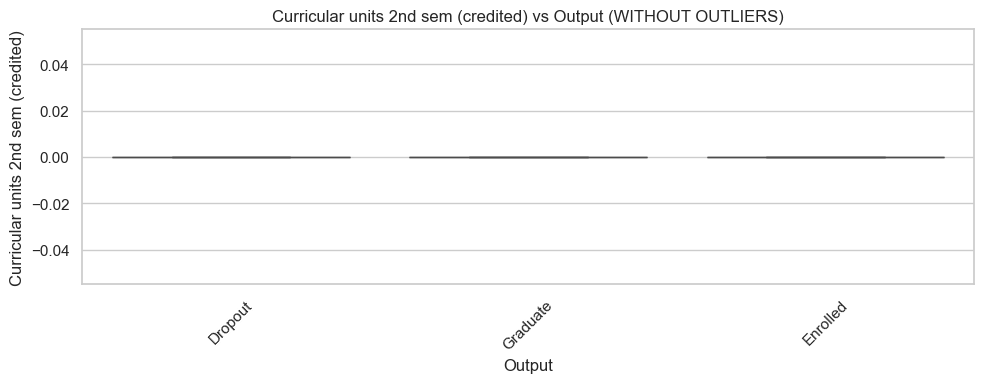

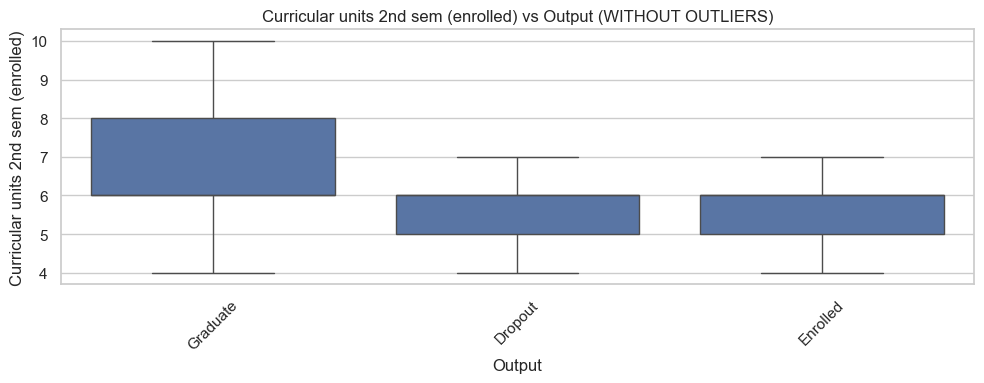

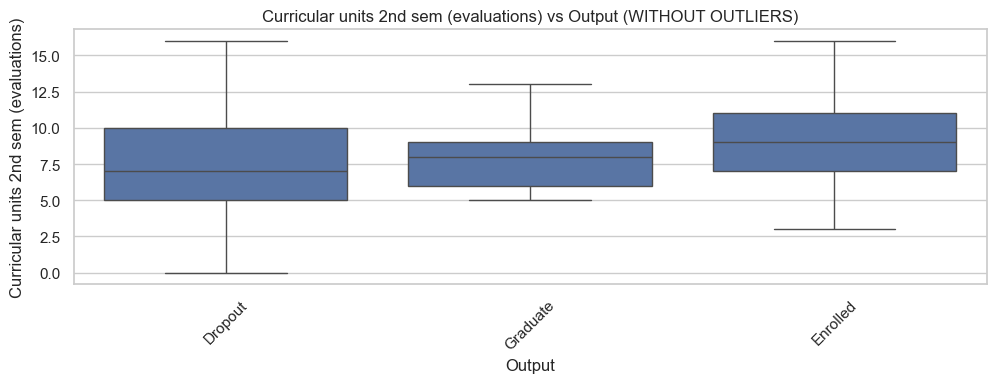

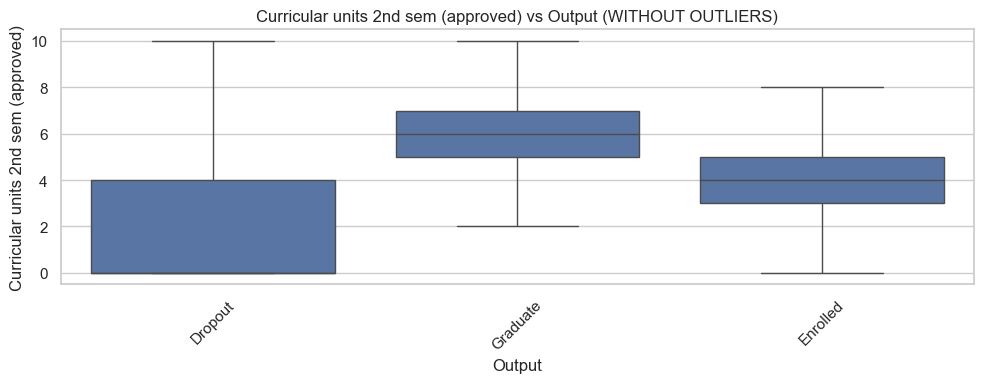

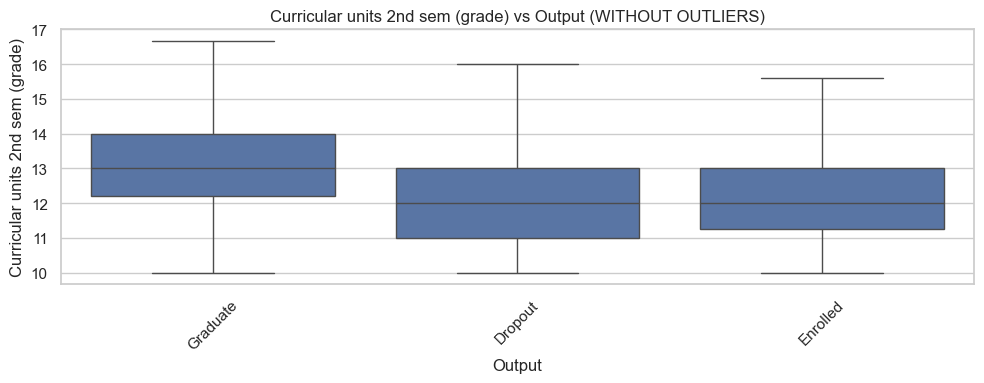

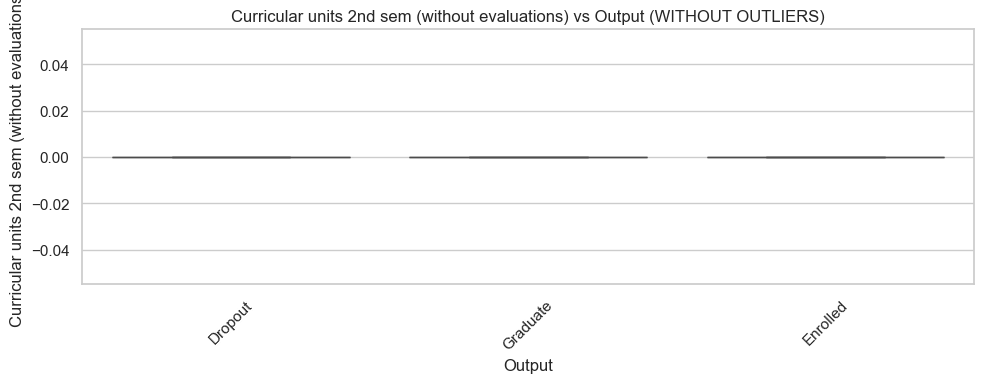

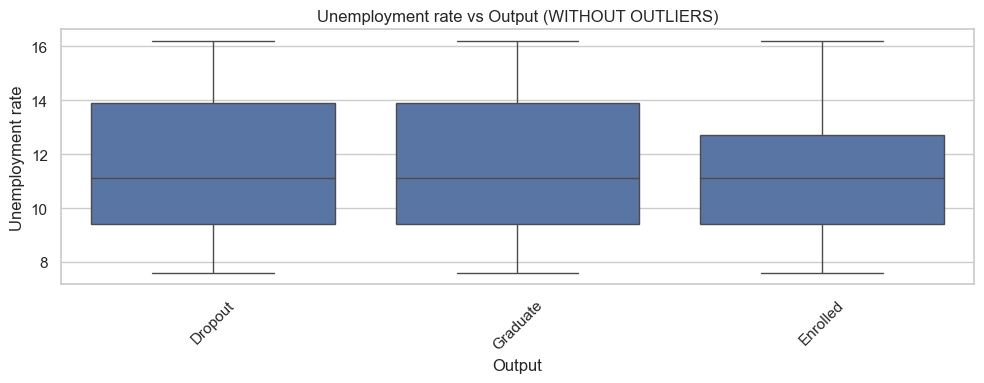

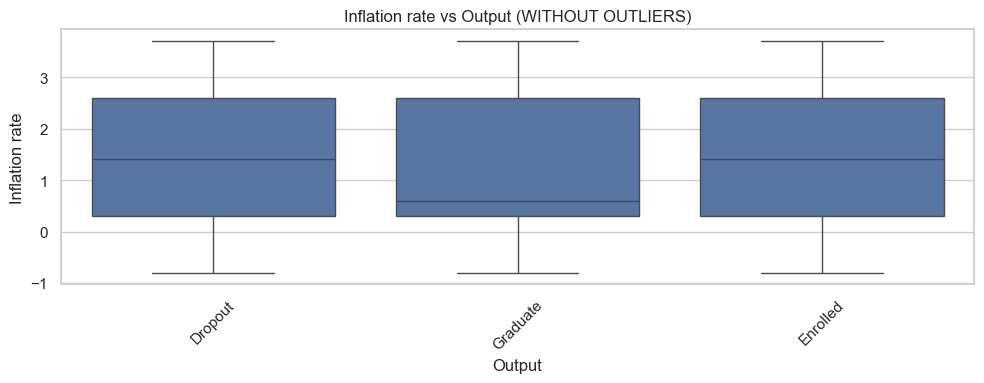

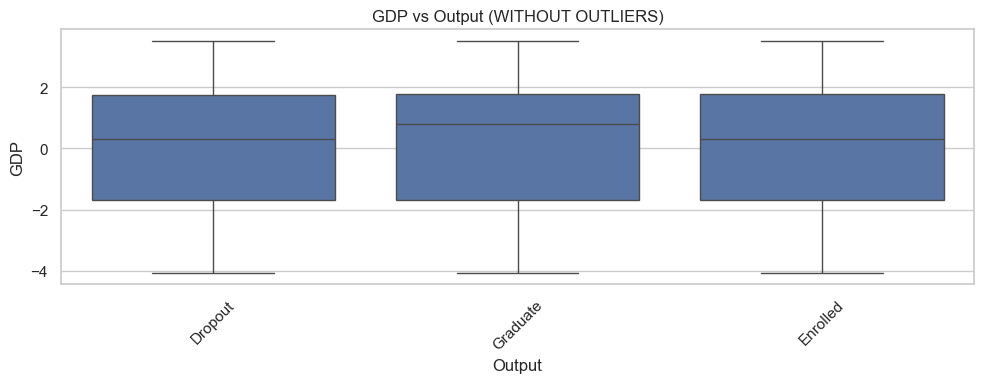

In [89]:
print("Generating boxplots WITHOUT OUTLIERS...")

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


for col in numeric_cols:
    df_clean = remove_outliers_iqr(df, col)

    plt.figure(figsize=(10,4))
    sns.boxplot(data=df_clean, x=TARGET_COL, y=col, showfliers=False)
    plt.title(f"{col} vs {TARGET_COL} (WITHOUT OUTLIERS)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [90]:
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3539, 34)
Test shape: (885, 34)


In [91]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Categorical columns: []


In [92]:
def build_preprocessor(scaler):
    """
    scaler: None, StandardScaler(), or MinMaxScaler()
    Returns a ColumnTransformer that applies scaler to numeric cols
    and OneHotEncoder to categorical cols.
    """
    transformers = []
    if numeric_cols:
        if scaler is None:
            transformers.append(("num", "passthrough", numeric_cols))
        else:
            transformers.append(("num", scaler, numeric_cols))
    if categorical_cols:
        transformers.append(("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols))

    preprocessor = ColumnTransformer(transformers=transformers)
    return preprocessor


def build_pipeline(scaler, model):
    preprocessor = build_preprocessor(scaler)
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ])
    return pipe

In [93]:
def evaluate_pipeline(name, pipeline, X_train, y_train, X_test, y_test, positive_label=None):
    # Fit
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # For binary classification: cm = [[TN, FP], [FN, TP]]
    if cm.shape == (2, 2):
        TN, FP, FN, TP = cm.ravel()
        specificity = TN / (TN + FP) if (TN + FP) > 0 else np.nan
        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else np.nan
    else:
        # For multiclass, we can approximate via macro-averaged recall, etc.
        specificity = np.nan
        sensitivity = recall_score(y_test, y_pred, average="macro")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary" if cm.shape == (2, 2) else "macro")
    recall = recall_score(y_test, y_pred, average="binary" if cm.shape == (2, 2) else "macro")
    f1 = f1_score(y_test, y_pred, average="binary" if cm.shape == (2, 2) else "macro")
    kappa = cohen_kappa_score(y_test, y_pred)

    # Cross-validation on training set
    cv_scores_5 = cross_val_score(pipeline, X_train, y_train, cv=5)
    cv_scores_10 = cross_val_score(pipeline, X_train, y_train, cv=10)

    result = {
        "setup": name,
        "accuracy": accuracy,
        "precision": precision,
        "recall (sensitivity)": recall,
        "specificity": specificity,
        "f1": f1,
        "kappa": kappa,
        "cv_mean_5": cv_scores_5.mean(),
        "cv_std_5": cv_scores_5.std(),
        "cv_mean_10": cv_scores_10.mean(),
        "cv_std_10": cv_scores_10.std()
    }
    return result

In [94]:
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs')

scaling_setups = [
    ("No scaling + LogisticRegression", None, log_reg),
    ("Z-score (StandardScaler) + LogisticRegression", StandardScaler(), log_reg),
    ("Unitization (MinMaxScaler) + LogisticRegression", MinMaxScaler(), log_reg),
]

results = []

for name, scaler, model in scaling_setups:
    pipe = build_pipeline(scaler, model)
    print(f"Evaluating: {name}")
    res = evaluate_pipeline(name, pipe, X_train, y_train, X_test, y_test)
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Evaluating: No scaling + LogisticRegression
Evaluating: Z-score (StandardScaler) + LogisticRegression
Evaluating: Unitization (MinMaxScaler) + LogisticRegression


,setup,accuracy,precision,recall (sensitivity),specificity,f1,kappa,cv_mean_5,cv_std_5,cv_mean_10,cv_std_10
0,No scaling + LogisticRegression,0.755932,0.691752,0.661929,NaN,0.668641,0.587785,0.767167,0.010904,0.767727,0.016855
1,Z-score (StandardScaler) + LogisticRegression,0.758192,0.696033,0.665199,NaN,0.672517,0.591573,0.766602,0.010828,0.767161,0.016598
2,Unitization (MinMaxScaler) + LogisticRegression,0.762712,0.702717,0.663266,NaN,0.671333,0.596025,0.762360,0.013086,0.764616,0.014588


In [ ]:
df_no_outliers = df.copy()

for col in numeric_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_no_outliers = df_no_outliers[
        (df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)
    ]

print("Original shape:", df.shape)
print("Without outliers:", df_no_outliers.shape)


Original shape: (4424, 35)
Without outliers: (675, 35)


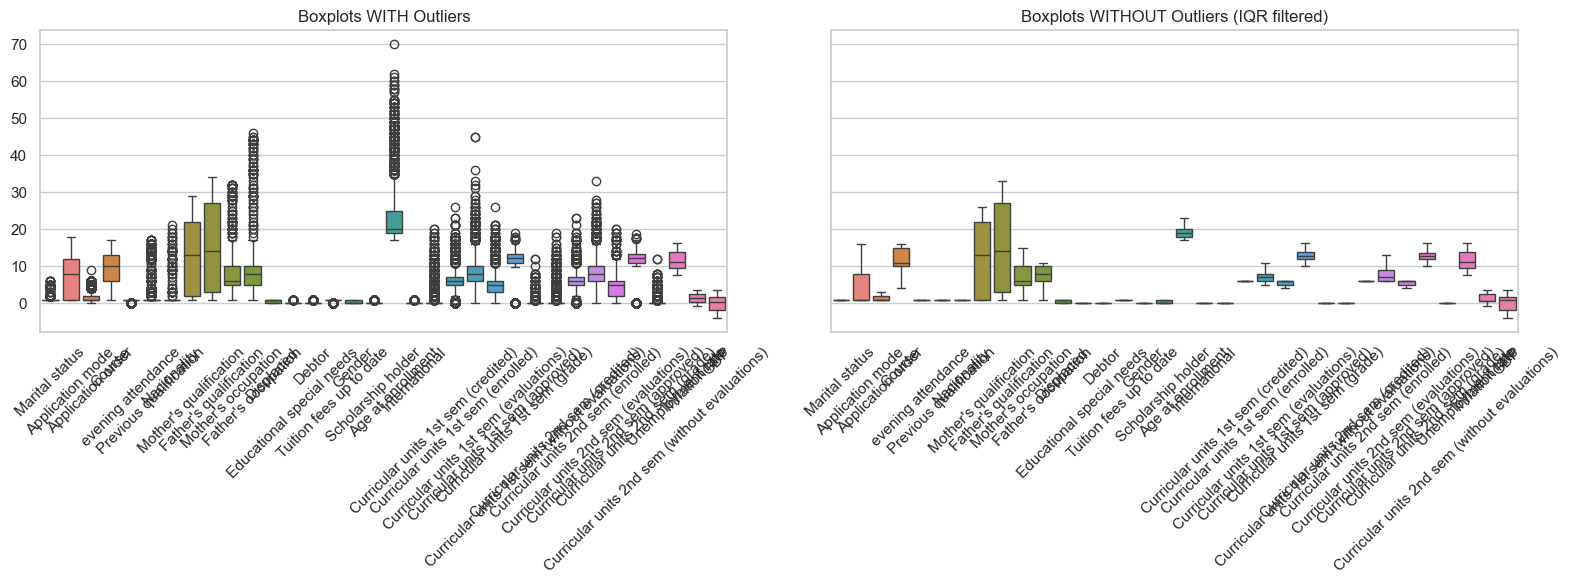

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Left: with outliers
sns.boxplot(data=df[numeric_cols], ax=axes[0])
axes[0].set_title("Boxplots WITH Outliers")
axes[0].tick_params(axis='x', rotation=45)

# Right: without outliers
sns.boxplot(data=df_no_outliers[numeric_cols], showfliers=False, ax=axes[1])
axes[1].set_title("Boxplots WITHOUT Outliers (IQR filtered)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
